In [ ]:
# NMF vs PCA for image compression

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [307]:
def load_image(path):
    '''
    Returns np array of greyscale pixel values, in range [0, 1]
    '''
    
    image = Image.open(image_path).convert('L')
    pixels = np.array(image)
    pixels = pixels/255
    return pixels


'''                                   NMF Functions                                     '''

def generate_random_matrix(rows, columns):
    return np.random.uniform(low=0.0, high=1.0, size=(rows, columns))

def NMF(path, rank):
    '''
    
    non-negative matrix factorization, using the multiplicaive update method 
    (https://doi.org/10.1038/44565)
    
    '''
    A = load_image(path)
    
    #initialize error measures
    error = np.inf
    last_error = np.inf
    
    # stopping condition for change in error
    epsilon = 1e-5  
    
    # Initial martix factors to optimize
    W = generate_random_matrix(A.shape[0], rank)
    H = generate_random_matrix(rank, A.shape[1])
    
    
    while t < 15000:
        # multiplicative update:
        W = (W * ((A @ H.transpose())/(W @ H @ H.transpose())))
        H = (H * ((W.transpose() @ A)/(W.transpose() @ W @ H)))
        
        # error (frobenius norm of difference / initial matrix)
        error = np.sqrt(np.abs(np.sum(A - (W @ H)))) / np.sqrt(np.sum(np.power(A, 2)))
        
        #stop the process if the error hasnt changed more than epsilon
        if np.abs(last_error - error) < epsilon:
            break 
        
        last_error = error
        

    
    return [W, H]

'''                                   PCA Functions                                     '''
def PCA_compression(path_to_image, principal_components, vertical_compression = True):
    
    '''
    Treats an image as a series of high dimensional data points, and uses 
    principal component analysis to find the dimensions of this high dimensional 
    space that preserve maximum variance.
    
    Finally, the original image is projected into a reduced space to 
    facilitate image compression.
    '''
    
    #load image
    A = load_image(path_to_image)
    
    #normalize columns of image and generate covariance matrix of image
    if vertical_compression:
        A_norm = A - np.mean(A, axis = 0)
        cov_matrix = A_norm.T @ A_norm
    else:
        A_norm = A - np.mean(A, axis = 1, keepdims=True)
        cov_matrix = A_norm @ A_norm.T
    
    #extract eigenvectors (principal components) and eigenvalues of cov matrix
    eva, evec = np.linalg.eigh(cov_matrix)
    
    #sort in order of eigenvalue magnitude so as to order the principal components
    idx = np.argsort(eva)[::-1]
    evec = evec[:, idx]
    
    #pull out the desired principal components
    PCs = evec[:, :principal_components]
    
    #project the image onto the space spanned by the selected principal components
    if vertical_compression:
        compressed_img = A @ (PCs @ PCs.T)
    else:
        compressed_img = (PCs @ PCs.T) @ A_norm
    
    #undo the previous normalization
    compressed_img += np.mean(A, axis = 0)
    
    return compressed_img

Text(0.5, 1.0, 'Compressed Reconstruction')

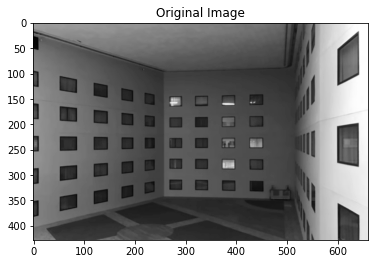

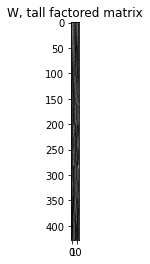

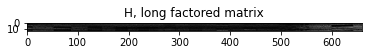

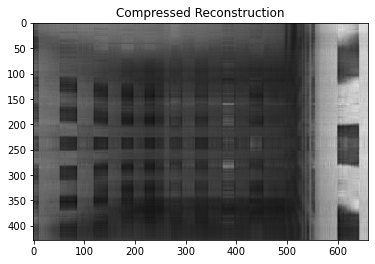

In [305]:
'''                                        NMF                                        '''

image_path = '/Users/nicklatina/Desktop/CLIP Prompts/Prompt LC.jpeg'
#visualize original image
plt.imshow(load_image(image_path), cmap = 'gray')
plt.title("Original Image")
plt.figure()

#compress image via NMF
NMF_img = NMF(image_path, 15)

#visualize the factored matricies
plt.imshow(NMF_img[0], cmap = 'gray')
plt.title("W, tall factored matrix")
plt.figure()
plt.imshow(NMF_img[1], cmap = 'gray')
plt.title("H, long factored matrix")

#visualize the reconstruction of the original image
plt.figure()
plt.imshow(NMF_img[0] @ NMF_img[1], cmap = 'gray')
plt.title("Compressed Reconstruction")

Text(0.5, 1.0, '15 PCs, Horizontal compression')

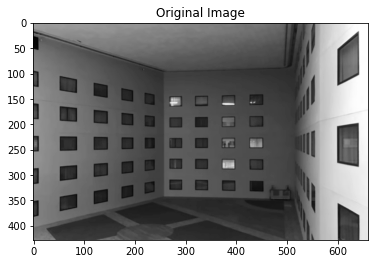

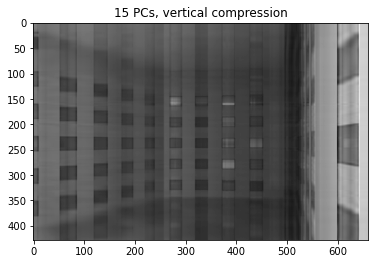

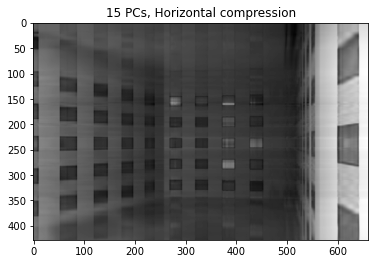

In [306]:
'''                                        PCA                                        '''

image_path = '/Users/nicklatina/Desktop/CLIP Prompts/Prompt LC.jpeg'
components = 15

#show original image
plt.imshow(load_image(image_path), cmap = 'gray')
plt.title("Original Image")
plt.figure()

# generate and show PCS compression along both axes
plt.imshow(PCA_compression(image_path, components, True), cmap = 'gray')
plt.title(f"{components} PCs, vertical compression")
plt.figure()
plt.imshow(PCA_compression(image_path, components, False), cmap = 'gray')
plt.title(f"{components} PCs, Horizontal compression")